#Machine Learning Engineer Nanodegree
##Model Evaluation & Validation
##Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

#Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [1]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


#Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

##Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [2]:
# Number of houses in the dataset
total_houses = np.size(housing_prices)

# Number of features in the dataset
total_features = np.size(housing_features[0])

# Minimum housing value in the dataset
minimum_price = np.min(housing_prices)

# Maximum housing value in the dataset
maximum_price = np.max(housing_prices)

# Mean house value of the dataset
mean_price = round(np.mean(housing_prices),3)

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = round (np.std(housing_prices),3)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


##Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer: The number of rooms a house has, the age of the house, and the crime rate are the most important features when dealing with this features set. This is because the number of rooms per dwelling (RM) matter when appraisers start looking for mortgage loans. This also applies to the crime rate (CRIM) and the age of the house. Appraisers use these features to compare homes with these features and establish base line prices for homes with those mentioned features.

The number of rooms measures how many rooms a house has per dwelling. CRIM measures per capita crime rate per town. The Age of the house measures the proportion of owner-occupied unite build prior to 1940.
**

##Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [3]:
print CLIENT_FEATURES

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


**Answer: The first entry, 11.95, corresponds to Crime Rates. The sixth entry, 5.609, corresponds average number of rooms per dwelling. The seventh entry, 90.0, corresponds to the age of the home, that is, if the home was built prior to 1940**

#Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

##Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!  
Ensure that you have executed the code block once you are done. You'll know if the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [4]:
# Put any import statements you need for this code block here

from sklearn import cross_validation

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """

    # Shuffle and split the data
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=0)
    #X_train = None
    #y_train = None
    #X_test = None
    #y_test = None

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


##Question 4
*Why do we split the data into training and testing subsets for our model?*

**Answer: Data is split up in order to find a good model to predict pricing based on known features. The training data creates a model and the test data points are used to see how well the model fits the points projected by the model. Eventually, these points are used in cross-validation and a performance metric to compute the error that the model has (the data set is put into "k" number of bins, takes one bin, and trains a model on the k-1 remaining bins). This ensure all data points are put into bins, and depending on k, will return errors pertaining to each permutation taken with these data sets.**

##Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know if the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [5]:
# Put any import statements you need for this code block here
from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = mean_squared_error(y_true, y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


##Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: The most appropriate performance metric is Mean Square Error. The reason is because accuracy, precision, recall, and F1 score deal with binary number of choices (you either were right or wrong about trying to guess an outcome based on your data). Moreover, this project wants to investigate prices and knowing how much error can be made when predicting prices has more relevance than knowing whether or not the guess was right or wrong (each getting a 1 or 0 score with respective to guess).

In this specific project, MSE or MAE are good candidates for performance metrics. However, MSE gives better results because MSE is a measure of the inherent risk associated with a prediction. Risk is how the magnitude of MSE is interpreted. What this means is that MSE gives the variance of the deviations between predicted values and observed values (MSE emphasizes deviations or outliers). Mean Absolute error is just an average of the absolute error for a prediction and its actual value. With this information, I know the variation in my deviances. Also, MSE allows calculus to be used to find minimum or maximum points of error.**

##Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know if the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [6]:
# Put any import statements you need for this code block

from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state = 0)

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(performance_metric, greater_is_better = False)

    # Make the GridSearchCV object
    reg = GridSearchCV(estimator = regressor, param_grid = parameters, scoring = scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

Successfully fit a model!


##Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: What grid search does is a take all possible permutations of parameters and reports which combination gives the best score using a defined performance metric. The grid search algorithm is applicable when looking for the optimal parameters in error reduction while maintaining a bias-variance balance.**

##Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: Cross-validation gives an estimate of performance on an independent set and checks for overfitting. Cross-validation divides all data in k-number of bins and take one of the bins as a the testing data set. The remaining k-1 data sets are used to train my model. Then the model takes another bin and uses the remaining k-1 bins as a training set. This repeats k number of times and averages results to use all data points in the training set mode as well as using all data for testing. Again, cross-validation is done to avoid overfitting of data. Industry uses k = 10 cross-validation as a standard for large data sets. Note: the percentage of data points to use as the training data set is abitrary and set by the user. Cross-validation is helpful to use with Grid Search because it fine tunes what max_depth is the best model to use for a given set of data by looking at the error associated with each model. What means is that Grid Search happens first, the results are cross-validated, evaluated and, finally, the grid search function reports what model works best.
**

#Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [7]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [8]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

#Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

C:\Users\Henry\Anaconda2\envs\dato-env\lib\site-packages\ipykernel\__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Henry\Anaconda2\envs\dato-env\lib\site-packages\ipykernel\__main__.py:27: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Henry\Anaconda2\envs\dato-env\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


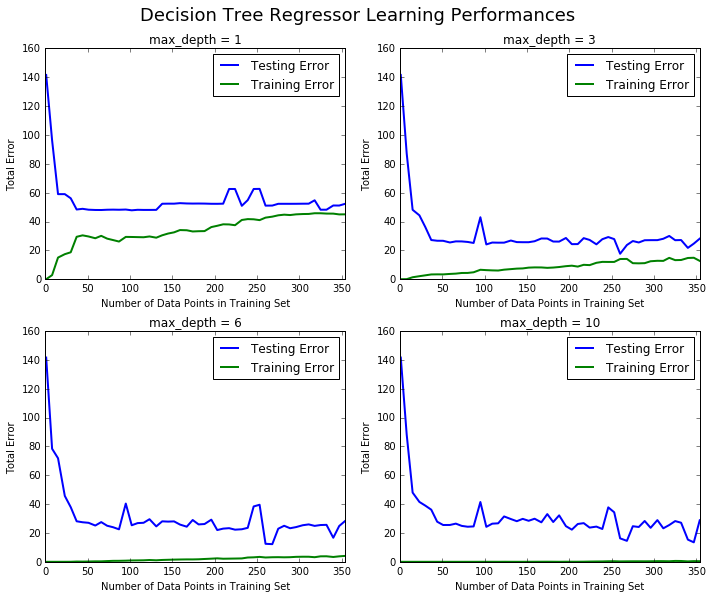

In [9]:
learning_curves(X_train, y_train, X_test, y_test)

##Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: For max_depth = 3 and for small number of training data points, training error is small since there are not that many data training data points to be comparing training data. Moreover, the model yielded high total error (near 140) for the testing data set because total error is computed using very few training points. 

As the training set increases the training error rose by small increments, but its training total error stayed below 30 for number of training points greater than 50 (which makes sense since a model wants to create a model that fits its training data points). As the number of data points in the training set increase, the testing error fluctuates around 30 in the plot for max_depth = 3. In short, for small number of data training data points, the training error rises and the testing error drops. As the number of training data points increases, training error continues to increase and testing data point error levels off to around 30 points on the vertical axis.**

##Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: For max_depth = 1, the model suffers from high bias because the model is not complex enough and over generalizes price predictions (the decision tree takes only one feature from the data set at a time and creates a model with that feature). This is true seeing as how total error drops as max_depth increases. The trend for testing error supports that for small max_depth, there is high error. The source of it is that the model is too simple given the number of parameter given in the data set. In additon, for larger values of max_depth, the testing error settles to 30 which also suggests that error for max_depth = 1 is much different than the error that max_depth (greater than or equal to 4) tended to.

For max_depth = 10, the total error is around 30. The reason for this might be because the model is over fitting training points. In fact, this makes sense because as more features are added to a data set, more data is required to create a model, hence the curse of dimensionality. What also helps make the case that the model is an overfit at max_depth = 10, is the fact that error settled around 30 for max_depth greater than or equal to 4. max_depths prior to max_depth = 10 could achieve the same result while producing the same type of error. Finally, decision trees are notorious for overfitting data when testing different number of parameters.**

Creating a model complexity graph. . . 


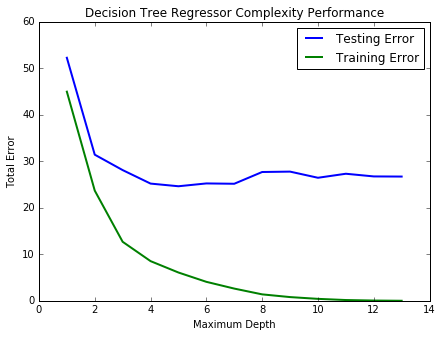

In [10]:
model_complexity(X_train, y_train, X_test, y_test)

##Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: For small max_depth, the total error for the testing set is high relative to what the error tends to. In fact, small max_depth values do not minimize error. Morever, this is also shows that the model is not complex enough and is not modeling the data to the target.

As max_depth increases, total error reduces for the training error. However, testing error hovers around 30 as max_depth increases. Max_depth = 10 produces the lowest training error while achieving the same testing error for max_depth greater than 3. This becomes a question of how much error in the training model is acceptable because the total error for the testing case remains around the same as max_depth increases. There are two explanations for this. Either there is high variance and more data is required given the number of training data points (70%) used and test points (30%). The other explanation is that the model suffers from high bias. If the model suffers from high bias, then regardless of how many data points I used to train my model, I will get around the same testing error. Moreover, high bias could be result of model complexity. 

Finally, the optimal point on the graph is max_depth = 6. The reason for this is because at max_depth = 5 both training error and test error are still decreasing. However, at max_depth = 6, the testing error is increasing and training error continunes to decrease. If I had to choose a fractional max_depth I would gample on 5.5, but max_depth is a discreet set of numbers and 6 plays it safe and accomodates for the worst case scenario. In other words, max_depth = 6 is the "sweet-spot."**

#Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. *To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

##Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [11]:
print "Final model optimal parameters:", reg.best_params_

Final model optimal parameters: {'max_depth': 6}


**Answer: My intuition would have led me astray because I would have resorted to using max_depth = 3 as the parameter that predicts house price. The reason my intuition is incorrect is because at max_depth = 3, the total testing error stops dropping and fluctuates around 30%. The model predicted that max_depth = 6.**

##Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [12]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 20.766


**Answer: Our model forecasts that the market value of the home with CLIENT_FEATURES is 20.766 with about 30 points of error when computing the price correctly. With respect to the mean of the data set (22.533) and median (21.2), my computed value is within one standard deviation (9.188) of the mean of the whole data. Yes, the selling price for CLIENT_FEATURES relative to the overall mean of the entire data set is less expensive, but that is to be expected considering that the mean, median, and standard deviation of the entire data set does not take into account features of the house in question. In fact, these features determine a house's selling price and have associated weights attributed to them that isn't obvious looking at the statistics computed at the beginning of the project.**

##Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: I would use this model as a guide to predict a house price using the given CLIENT_FEATURES. However, I would take the predicted value with a grain of salt because housing prices fluctuate with how the economy is performing at the time. Moreover, the computed value from model (22.533) is a number that I would leverage as a real estate agent. In fact, that could be the floor value in the sense that it could be a price that I negotiate down to, rather than use it as an advertised price. One of the reasons why I would use 22.533 as a last resort price is because of the error associated with the model. After max_depth = 3, the testing error hovered about 30 points and that could be hint that even if I make a sale, I could lose out on bottom-line profit if a house sold for a price less than what is "worth." **